## Data Challenge 2: Yammer

Sarah Rustan

## Problem

The number of weekly active users increased more than 100% between the beginning of May and the end of July, with only a few time periods showing even mild decreases. However, weekly active users decreased rougly 18% between the beginning and end of August, with the largest decrease occurring in the first week of August. What happened?

## Hypotheses and Results

**Hypothesis 1:** Something happened in the account creation process that reduced conversion from pending to active.

**Results:** The rate of conversion from user creation to completing signup were similar in August as compared to May/June/July (52% vs. 50%), and the rate of attrition was similar at each step. The user activation funnel does not appear to be suffering from any new barriers to user activation.    

**Hypothesis 2:** There is a drop in a particular type of user-driven engagement and, as a result, overall engagement has decreased.

**Results:** Even though overall user-driven engagements are down in August, the relative frequency of each type of engagement is remarkably consistent (less than 1% difference in each category), indicating that once users are on Yammer there is no signficant difference in their behavior.

**Bottom line:** I was unable to find any explanatory patterns for the decrease in customer engagement. With additional time, I would explore whether there are particular locations or companies where employee engagement is particularly sufferring and whether there has been a significant decrease in any particular types of Yammer-generated engagement events. 

**Takeaway:** I should have invested in more EDA up front. I thought I was taking the right approach by starting with hypotheses, but I neglected to base the hypothesis on EDA and therefore wasted a significant amount of time. As a result, I was unable to reach a useful conclusion in the time given. My goal for this weekend is to increase my skills in EDA in Python so that I can explore datasets more quickly and efficiently.

## Analysis

#### Hypothesis 1: Something happened in the account creation process that reduced conversion from pending to active.

Approach: Split the dataset into before and after August 1, and use population pyramid to visualize the account creation/activation funnel with the goal of determining whether a problem occurred in August that is reducing the number of account activation and, if so, at what point in the process that problem occurred.

Method: Read in 'Events' yammer_events.csv dataset. Create a dummy variable that identifies whether an event occurred on or after August 1 (aug_event where 1 Yes, 0 No). *(Note that this does not identify cases where user authentification began in June or July but was completed in August, but should still include a reasonable approximation of the process since edge cases on either end are also included.)* Select only events that occur in the user authentication process (event_type == signup_flow). Visualize user authentication funnel (create_user, enter_email, enter_info, complete_signup) comparing before August to August using a population pyramid. If no bottleneck is visible, merge in user authentication date from 'Users' yammer_users.csv as new rows to check the number of activations (activated_at).

In [2]:
# Import likely packages
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
# Read in 'Events' yammer_events.csv and look at data structure of first few rows
events = pd.read_csv('yammer_events.csv')
events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [4]:
events.shape

(340832, 7)

In [5]:
# Create a dummy variable that identifies whether an event occurred 
# on or after August 1 (aug_event where 1 Yes, 0 No).
events['in_august'] = 0
events['in_august'] = np.where((pd.to_datetime(pd.Series(events['occurred_at']))) >= (pd.to_datetime('20140801', format='%Y%m%d')), 1, 0)
events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,in_august
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,0


In [6]:
events.tail()

,user_id,occurred_at,event_type,event_name,location,device,user_type,in_august
340827,18815.0,2014-08-31 13:41:46,engagement,like_message,Ireland,dell inspiron notebook,2.0,1
340828,18815.0,2014-08-31 13:42:11,engagement,home_page,Ireland,dell inspiron notebook,2.0,1
340829,18815.0,2014-08-31 13:42:43,engagement,send_message,Ireland,dell inspiron notebook,2.0,1
340830,18815.0,2014-08-31 13:43:07,engagement,home_page,Ireland,dell inspiron notebook,2.0,1
340831,18815.0,2014-08-31 13:43:42,engagement,like_message,Ireland,dell inspiron notebook,2.0,1


In [7]:
events.shape

(340832, 8)

In [8]:
# Select only events that occur in the user authentication process (event_type == signup_flow).
auth_process = events[events.event_type == 'signup_flow']
auth_process.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,in_august
391,11768.0,2014-05-01 08:01:36,signup_flow,create_user,France,macbook pro,NaN,0
392,11768.0,2014-05-01 08:02:06,signup_flow,enter_email,France,macbook pro,NaN,0
393,11768.0,2014-05-01 08:02:39,signup_flow,enter_info,France,macbook pro,NaN,0
394,11768.0,2014-05-01 08:03:12,signup_flow,complete_signup,France,macbook pro,3.0,0
401,11769.0,2014-05-01 02:37:43,signup_flow,create_user,United Kingdom,lenovo thinkpad,NaN,0


In [9]:
auth_process.tail()

,user_id,occurred_at,event_type,event_name,location,device,user_type,in_august
51569,19063.0,2014-08-31 07:11:11,signup_flow,enter_email,Brazil,ipad mini,NaN,1
51570,19063.0,2014-08-31 07:11:40,signup_flow,enter_info,Brazil,ipad mini,NaN,1
51571,19063.0,2014-08-31 07:12:09,signup_flow,complete_signup,Brazil,ipad mini,3.0,1
51580,19064.0,2014-08-31 17:45:18,signup_flow,create_user,United States,iphone 5s,NaN,1
51581,19065.0,2014-08-31 19:29:19,signup_flow,create_user,Italy,lenovo thinkpad,NaN,1


In [10]:
auth_process.shape

(19257, 8)

In [11]:
funnel_data = auth_process.groupby(['in_august','event_name'], as_index=False).count()

In [12]:
funnel_data

,in_august,event_name,user_id,occurred_at,event_type,location,device,user_type
0,0,complete_signup,2649,2649,2649,2649,2649,2649
1,0,create_user,5308,5308,5308,5308,5308,0
2,0,enter_email,3211,3211,3211,3211,3211,0
3,0,enter_info,2793,2793,2793,2793,2793,0
4,1,complete_signup,1031,1031,1031,1031,1031,1031
5,1,create_user,1990,1990,1990,1990,1990,0
6,1,enter_email,1196,1196,1196,1196,1196,0
7,1,enter_info,1079,1079,1079,1079,1079,0


In [13]:
funnel_data = funnel_data.sort_values(['user_id'], ascending = False)

In [14]:
funnel_data

,in_august,event_name,user_id,occurred_at,event_type,location,device,user_type
1,0,create_user,5308,5308,5308,5308,5308,0
2,0,enter_email,3211,3211,3211,3211,3211,0
3,0,enter_info,2793,2793,2793,2793,2793,0
0,0,complete_signup,2649,2649,2649,2649,2649,2649
5,1,create_user,1990,1990,1990,1990,1990,0
6,1,enter_email,1196,1196,1196,1196,1196,0
7,1,enter_info,1079,1079,1079,1079,1079,0
4,1,complete_signup,1031,1031,1031,1031,1031,1031


In [66]:
# Visualize user authentication funnel: create_user, enter_email, enter_info, complete_signup.
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'in_august'
order_of_bars = funnel_data.event_name.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(funnel_data[group_col].unique())-1)) for i in range(len(funnel_data[group_col].unique()))]

<Figure size 1040x800 with 0 Axes>

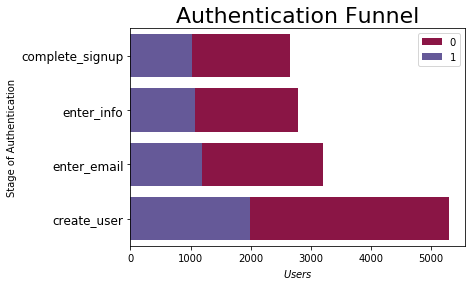

In [67]:
for c, group in zip(colors, funnel_data[group_col].unique()):
    sns.barplot(x='user_id', y='event_name', data=funnel_data.loc[funnel_data[group_col]==group, :], order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Authentication")
plt.yticks(fontsize=12)
plt.title("Authentication Funnel", fontsize=22)
plt.legend()
plt.show()

The rate of conversion from user creation to completing signup were similar in August as compared to May/June/July (52% vs. 50%), and the rate of attrition was similar at each step, so the next step will be checking whether there was a significant dropoff in activation in August as compared to May/June/July.

Add activation into dataset

In [20]:
# Read in 'Events' yammer_events.csv and look at data structure of first few rows
users = pd.read_csv('yammer_users.csv')
users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [25]:
# Create a dummy variable that identifies whether an event occurred on or after
# August 1 (aug_event where 1 Yes, 0 No)
users['in_august'] = 0
users['in_august'] = np.where((pd.to_datetime(pd.Series(users['activated_at']))) >= (pd.to_datetime('20140801', format='%Y%m%d')), 1, 0)
users.head()

,user_id,created_at,company_id,language,activated_at,state,in_august
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,0
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending,0
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending,0
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active,0
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,0


In [26]:
users.tail()

,user_id,created_at,company_id,language,activated_at,state,in_august
19061,19061.0,2014-08-31 13:21:16,2156.0,chinese,2014-08-31 13:22:50,active,1
19062,19062.0,2014-08-31 19:21:23,7520.0,spanish,NaN,pending,0
19063,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active,1
19064,19064.0,2014-08-31 17:45:18,2.0,english,NaN,pending,0
19065,19065.0,2014-08-31 19:29:19,8352.0,italian,NaN,pending,0


In [27]:
# Create a dummy variable that identifies whether an event occurred before
# May 1 (before where 1 Yes, 0 No)
users['before'] = 0
users['before'] = np.where((pd.to_datetime(pd.Series(users['activated_at']))) < (pd.to_datetime('20140501', format='%Y%m%d')), 1, 0)
users.head()

,user_id,created_at,company_id,language,activated_at,state,in_august,before
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,0,1
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending,0,0
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending,0,0
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active,0,1
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,0,1


In [28]:
users.shape

(19066, 8)

In [35]:
# Drop users that activated before May 1
new_users = users[users.before == 0]
new_users.shape

(13365, 8)

In [36]:
# Select only active users
active_users = new_users[new_users.state == 'active']
active_users.head()

,user_id,created_at,company_id,language,activated_at,state,in_august,before
11768,11768.0,2014-05-01 08:01:36,8099.0,french,2014-05-01 08:03:12,active,0,0
11770,11770.0,2014-05-01 06:07:24,7847.0,japanese,2014-05-01 06:08:50,active,0,0
11775,11775.0,2014-05-01 16:36:49,5545.0,english,2014-05-01 16:38:06,active,0,0
11778,11778.0,2014-05-01 18:48:21,3059.0,english,2014-05-01 18:49:49,active,0,0
11779,11779.0,2014-05-01 18:23:21,10905.0,german,2014-05-01 18:24:54,active,0,0


In [37]:
active_users.tail()

,user_id,created_at,company_id,language,activated_at,state,in_august,before
19056,19056.0,2014-08-31 16:35:29,1234.0,english,2014-08-31 16:36:56,active,1,0
19059,19059.0,2014-08-31 19:51:59,6817.0,indian,2014-08-31 19:53:43,active,1,0
19060,19060.0,2014-08-31 12:19:23,1439.0,japanese,2014-08-31 12:20:48,active,1,0
19061,19061.0,2014-08-31 13:21:16,2156.0,chinese,2014-08-31 13:22:50,active,1,0
19063,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active,1,0


In [38]:
active_users.shape

(3680, 8)

In [43]:
# Drop unneeded columns
active_users.columns.values

array(['user_id', 'created_at', 'company_id', 'language', 'activated_at',
       'state', 'in_august', 'before'], dtype=object)

In [48]:
mask = ['user_id','in_august']
filtered_active_users = active_users[mask]

In [49]:
filtered_active_users.head()

,user_id,in_august
11768,11768.0,0
11770,11770.0,0
11775,11775.0,0
11778,11778.0,0
11779,11779.0,0


In [50]:
filtered_active_users.tail()

,user_id,in_august
19056,19056.0,1
19059,19059.0,1
19060,19060.0,1
19061,19061.0,1
19063,19063.0,1


In [52]:
activate = filtered_active_users.groupby('in_august', as_index = False).count()
activate

,in_august,user_id
0,0,2649
1,1,1031


In [57]:
# Create new variable event_name = activate_user
activate['event_name'] = 'activate_user'
activate

,in_august,user_id,event_name
0,0,2649,activate_user
1,1,1031,activate_user


Apparently, complete_signup is equivalent to activation, so adding an activation level based on the activation date and time didn't add any additional information. There did not appear to be any significant difference in the user authentication funnel between August and May-June, so a problem in the user authentication process is unlikely to be the issue.

**Note:** I realized at this point that some additional EDA might have kept me from spending too much time going down this road; for example, a simple line graph representing the number of new users over time would have shown me that there were no significant decreases in account creation.

#### Hypothesis 2: There is a drop in a particular type of user-driven engagement and, as a result, overall engagement has decreased.

Approach: Split the dataset into before and after August 1 and compare the distribution of engagement activities in each time period.

Method: Read in 'Events' yammer_events.csv dataset. Create a dummy variable that identifies whether an event occurred on or after August 1 (aug_event where 1 Yes, 0 No). *(Note that this does not identify cases where user authentification began in June or July but was completed in August, but should still include a reasonable approximation of the process since edge cases on either end are also included.)* Select only engagement events (event_type == engagement). Compare the distribution of engagement activities (home_page, like_message, login, search_autocomplete, search_run, search_click_result_X, send_message, view_inbox) comparing before August to August.

In [59]:
# Read in 'Events' yammer_events.csv and look at data structure of first few rows
events = pd.read_csv('yammer_events.csv')
events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [61]:
# Create a dummy variable that identifies whether an event occurred on or after
# August 1 (aug_event where 1 Yes, 0 No)
# Note that this dataset does not include events that occurred before May 1 (other than activation)
# So there is no need to filter out old events
events['in_august'] = 0
events['in_august'] = np.where((pd.to_datetime(pd.Series(events['occurred_at']))) >= (pd.to_datetime('20140801', format='%Y%m%d')), 1, 0)
events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,in_august
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,0


In [62]:
events.tail()

,user_id,occurred_at,event_type,event_name,location,device,user_type,in_august
340827,18815.0,2014-08-31 13:41:46,engagement,like_message,Ireland,dell inspiron notebook,2.0,1
340828,18815.0,2014-08-31 13:42:11,engagement,home_page,Ireland,dell inspiron notebook,2.0,1
340829,18815.0,2014-08-31 13:42:43,engagement,send_message,Ireland,dell inspiron notebook,2.0,1
340830,18815.0,2014-08-31 13:43:07,engagement,home_page,Ireland,dell inspiron notebook,2.0,1
340831,18815.0,2014-08-31 13:43:42,engagement,like_message,Ireland,dell inspiron notebook,2.0,1


In [63]:
# Select only events user engagement process (event_type == engagement).
engagement = events[events.event_type == 'engagement']
engagement.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,in_august
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,0


In [71]:
# Group data to compare August vs other
engagement_data = engagement.groupby(['in_august','event_name'], as_index=False).count()

In [72]:
engagement_data

,in_august,event_name,user_id,occurred_at,event_type,location,device,user_type
0,0,home_page,72462,72462,72462,72462,72462,72462
1,0,like_message,45916,45916,45916,45916,45916,45916
2,0,login,29339,29339,29339,29339,29339,29339
3,0,search_autocomplete,13351,13351,13351,13351,13351,13351
4,0,search_click_result_1,1139,1139,1139,1139,1139,1139
5,0,search_click_result_10,403,403,403,403,403,403
6,0,search_click_result_2,1203,1203,1203,1203,1203,1203
7,0,search_click_result_3,899,899,899,899,899,899
8,0,search_click_result_4,1007,1007,1007,1007,1007,1007
9,0,search_click_result_5,786,786,786,786,786,786


In [78]:
engagement_data = engagement_data.sort_values(['in_august', 'event_name'], ascending = False)

In [79]:
engagement_data

,in_august,event_name,user_id,occurred_at,event_type,location,device,user_type
33,1,view_inbox,13011,13011,13011,13011,13011,13011
32,1,send_message,7324,7324,7324,7324,7324,7324
31,1,search_run,2836,2836,2836,2836,2836,2836
30,1,search_click_result_9,142,142,142,142,142,142
29,1,search_click_result_8,135,135,135,135,135,135
28,1,search_click_result_7,153,153,153,153,153,153
27,1,search_click_result_6,170,170,170,170,170,170
26,1,search_click_result_5,182,182,182,182,182,182
25,1,search_click_result_4,257,257,257,257,257,257
24,1,search_click_result_3,235,235,235,235,235,235


In [85]:
    # Group data to calculate total engagement in both groups
    total_engagement = engagement.groupby(['in_august'], as_index=False).count()
    total_engagement

,in_august,user_id,occurred_at,event_type,event_name,location,device,user_type
0,0,247782,247782,247782,247782,247782,247782,247782
1,1,73793,73793,73793,73793,73793,73793,73793


Even though overall engagements are down in August, the relative frequency of each type of engagement is remarkably consistent (less than 1% difference in each category), indicating that once users are on Yammer there is no signficant difference in their behavior.